In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
titanic_df=pd.read_csv('tested.csv') 

In [3]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
columns_to_drop=['PassengerId', 'Name', 'Cabin', 'Embarked', 'Age', 'Ticket']

In [6]:
titanic_df=titanic_df.drop(columns_to_drop, axis=1)

In [7]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex           int64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [8]:
titanic_df.fillna(0)

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,1,0,0,7.8292
1,1,3,2,1,0,7.0000
2,0,2,1,0,0,9.6875
3,0,3,1,0,0,8.6625
4,1,3,2,1,1,12.2875
...,...,...,...,...,...,...
413,0,3,1,0,0,8.0500
414,1,1,2,0,0,108.9000
415,0,3,1,0,0,7.2500
416,0,3,1,0,0,8.0500


<Axes: >

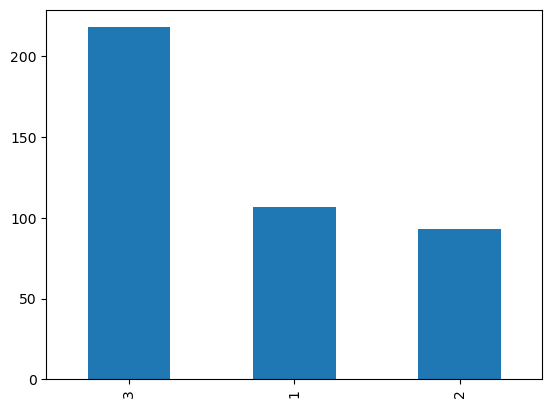

In [9]:
titanic_df['Pclass'].value_counts().plot(kind='bar')

<Axes: >

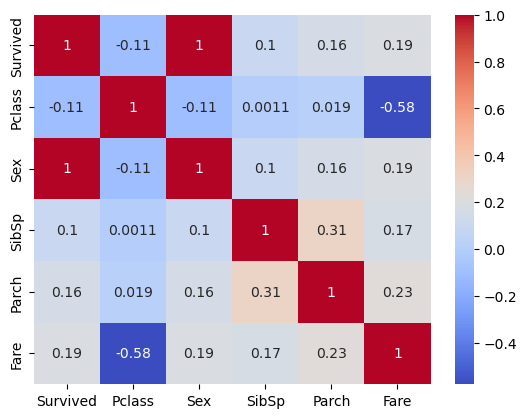

In [10]:
# Create a correlation matrix
corr_matrix = titanic_df.corr()



# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True)

In [11]:
Y=titanic_df['Survived']

In [12]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [13]:
X=titanic_df.drop('Survived', axis=1)

In [14]:
X

,Pclass,Sex,SibSp,Parch,Fare
0,3,1,0,0,7.8292
1,3,2,1,0,7.0000
2,2,1,0,0,9.6875
3,3,1,0,0,8.6625
4,3,2,1,1,12.2875
...,...,...,...,...,...
413,3,1,0,0,8.0500
414,1,2,0,0,108.9000
415,3,1,0,0,7.2500
416,3,1,0,0,8.0500


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=101)

In [18]:
log_model=LogisticRegression()


In [19]:
X_train

,Pclass,Sex,SibSp,Parch,Fare
41,1,1,0,0,26.5500
24,1,2,1,3,262.3750
237,3,1,0,0,7.2250
309,3,2,1,0,14.1083
154,3,1,4,2,31.3875
...,...,...,...,...,...
63,3,2,0,0,7.7250
326,2,2,2,1,39.0000
337,3,1,0,2,7.2292
11,1,1,0,0,26.0000


In [20]:
titanic_df.fillna(0)

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,1,0,0,7.8292
1,1,3,2,1,0,7.0000
2,0,2,1,0,0,9.6875
3,0,3,1,0,0,8.6625
4,1,3,2,1,1,12.2875
...,...,...,...,...,...,...
413,0,3,1,0,0,8.0500
414,1,1,2,0,0,108.9000
415,0,3,1,0,0,7.2500
416,0,3,1,0,0,8.0500


In [21]:
log_model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [23]:
titanic_df.fillna(0)

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,1,0,0,7.8292
1,1,3,2,1,0,7.0000
2,0,2,1,0,0,9.6875
3,0,3,1,0,0,8.6625
4,1,3,2,1,1,12.2875
...,...,...,...,...,...,...
413,0,3,1,0,0,8.0500
414,1,1,2,0,0,108.9000
415,0,3,1,0,0,7.2500
416,0,3,1,0,0,8.0500


In [24]:
y_train

41     0
24     1
237    0
309    1
154    0
      ..
63     1
326    1
337    0
11     0
351    0
Name: Survived, Length: 292, dtype: int64

In [26]:
X_train

,Pclass,Sex,SibSp,Parch,Fare
41,1,1,0,0,26.5500
24,1,2,1,3,262.3750
237,3,1,0,0,7.2250
309,3,2,1,0,14.1083
154,3,1,4,2,31.3875
...,...,...,...,...,...
63,3,2,0,0,7.7250
326,2,2,2,1,39.0000
337,3,1,0,2,7.2292
11,1,1,0,0,26.0000


In [28]:
from sklearn. model_selection import train_test_split

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=101)

In [32]:
log_model = LogisticRegression()

In [33]:
log_model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [36]:
titanic_df.fillna(0)

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,1,0,0,7.8292
1,1,3,2,1,0,7.0000
2,0,2,1,0,0,9.6875
3,0,3,1,0,0,8.6625
4,1,3,2,1,1,12.2875
...,...,...,...,...,...,...
413,0,3,1,0,0,8.0500
414,1,1,2,0,0,108.9000
415,0,3,1,0,0,7.2500
416,0,3,1,0,0,8.0500


In [37]:
log_model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values